In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge




In [5]:
data=pd.read_csv(r"C:\Users\Nourhan\Downloads\SeoulBikeData.csv", encoding='ISO-8859-1')


Data Preprocessing

In [6]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
data['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
data.shape

(8760, 14)

In [11]:
data.duplicated().sum()

0

In [12]:
#mapping binary columns into 0 and 1
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
data['Functioning Day'] = data['Functioning Day'].map({'No': 0, 'Yes': 1})

#one hot encoding for multi valued columns
# data = pd.get_dummies(data, columns=['Seasons'], drop_first=True)
data = pd.get_dummies(data, columns=['Seasons'])

data.drop(columns=['Date'],inplace=True)
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,False,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,False,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,False,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,False,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,True,False,False,False
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,True,False,False,False
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,True,False,False,False
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,True,False,False,False


In [13]:
data['Seasons_Spring'] = data['Seasons_Spring'].map({False: 0, True: 1})
data['Seasons_Autumn'] = data['Seasons_Autumn'].map({False: 0, True: 1})
data['Seasons_Summer'] = data['Seasons_Summer'].map({False: 0, True: 1})
data['Seasons_Winter'] = data['Seasons_Winter'].map({False: 0, True: 1})

In [14]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324,0.249315,0.252055,0.252055,0.246575
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537,0.180404,0.432641,0.434217,0.434217,0.431042
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Seasons_Autumn             8760 non-null   int64  
 13  Seasons_Spring             8760 non-null   int64

In [16]:
#correlation to show which feature affects the target the most
correlation = data.corr(numeric_only=True)

# Check correlation with the target variable 'Price'
corr_with_price = correlation['Rented Bike Count'].drop('Rented Bike Count')  # Drop self-correlation

# Sort by correlation (descending)
top_corr = corr_with_price.abs().sort_values(ascending=False)

print(top_corr)

Temperature(°C)              0.538558
Seasons_Winter               0.424925
Hour                         0.410257
Dew point temperature(°C)    0.379788
Seasons_Summer               0.296549
Solar Radiation (MJ/m2)      0.261837
Functioning Day              0.203943
Humidity(%)                  0.199780
Visibility (10m)             0.199280
Snowfall (cm)                0.141804
Rainfall(mm)                 0.123074
Wind speed (m/s)             0.121108
Seasons_Autumn               0.102753
Holiday                      0.072338
Seasons_Spring               0.022888
Name: Rented Bike Count, dtype: float64


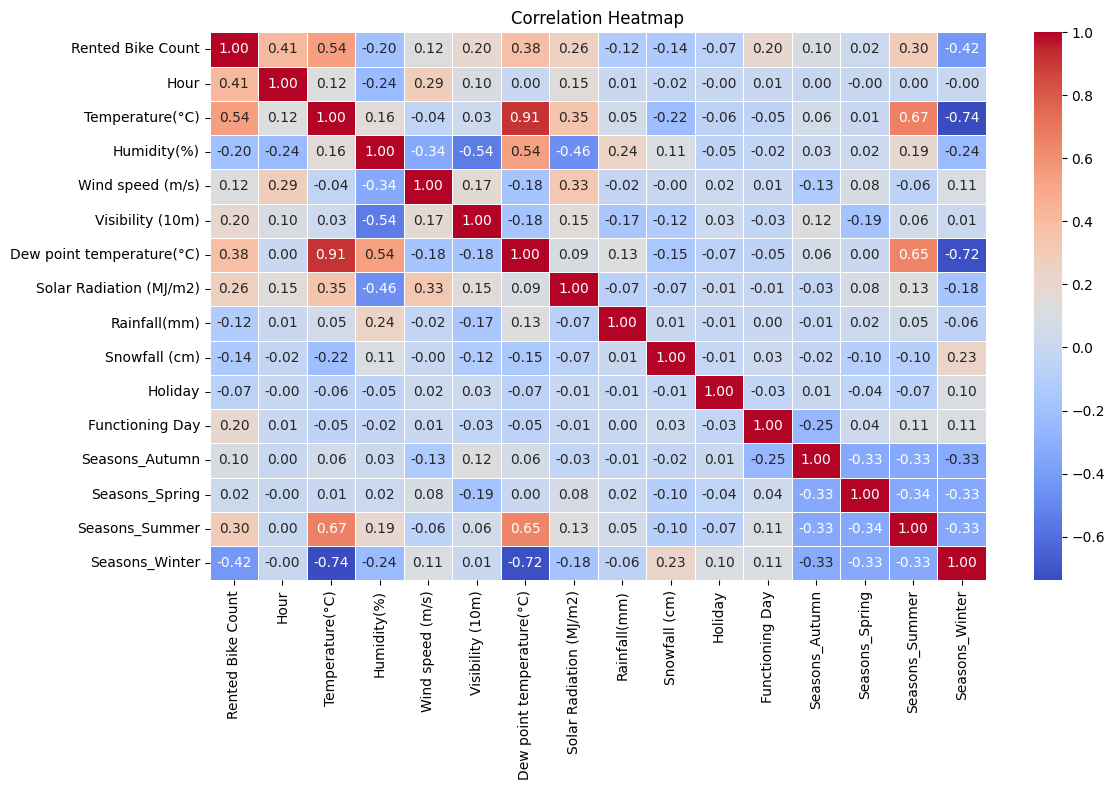

In [17]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

from the correlation matrix it is shown that the most affecting feature is the temperature

simple linear regression

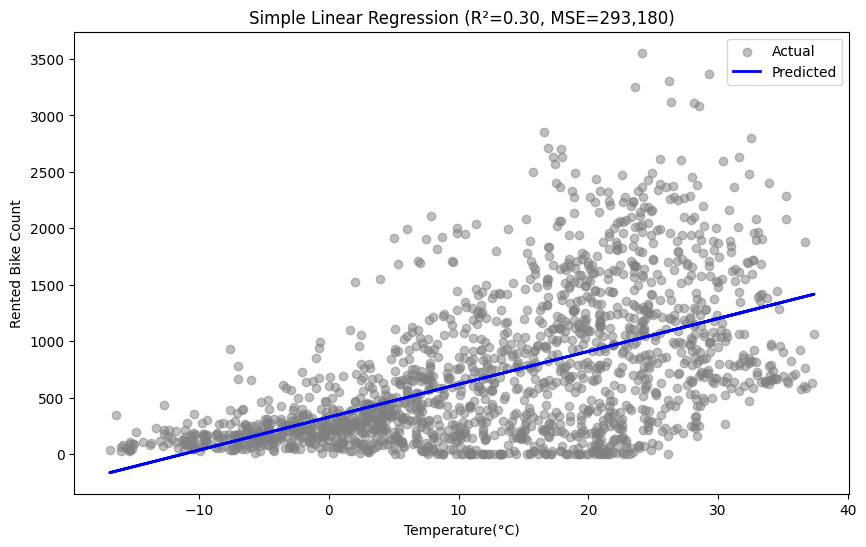

Coefficient: [346.3303386]
Intercept: 704.7678367579908
Mean Squared Error (MSE): 293180.0061746947
R2 Score: 0.2963334847635002


In [18]:
x=data[['Temperature(°C)']]  #most affecting feature
y=data['Rented Bike Count']  #target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#scaling the data to not have a dominant feature
scaler = StandardScaler()
X_train_scaledd = scaler.fit_transform(X_train)
X_test_scaledd = scaler.transform(X_test)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_scaledd, y_train)   #fitting the model (learning) 

# Predict
y_pred = lin_reg.predict(X_test_scaledd)  

# Metrics
r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color='blue', linewidth=2, label="Predicted")
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.title(f"Simple Linear Regression (R²={r2:.2f}, MSE={mse:,.0f})")
plt.legend()
plt.show()

print("Coefficient:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Multiple linear regression


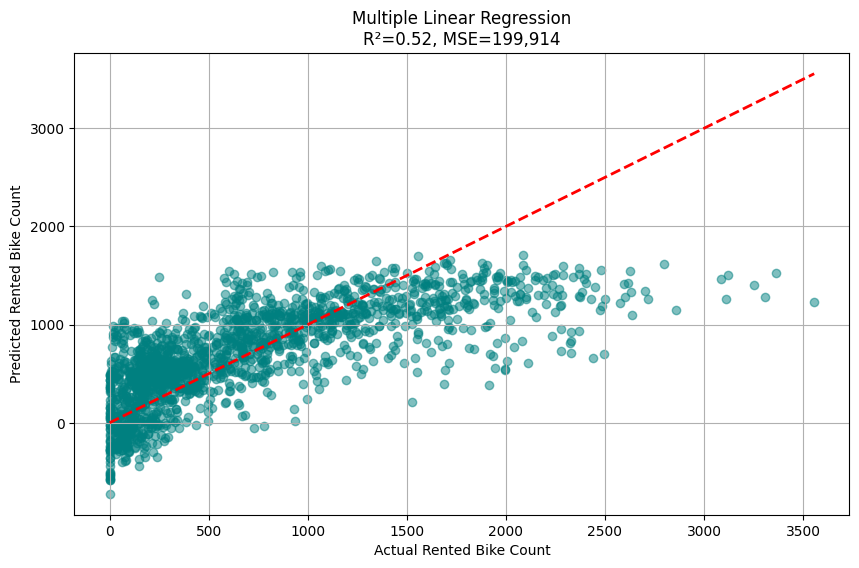

Coefficient: [ 146.54209541  199.82393389  197.04723375 -243.77450025  -62.92122797
  163.16252806   24.70290251 -119.51671264  -42.90546797]
Intercept: 704.7678367579907
Mean Squared Error (MSE): 199913.91638107822
R2 Score: 0.5201830755016328


In [19]:
x_multi = data[[
    'Temperature(°C)',
    'Dew point temperature(°C)',
    'Hour',
    'Humidity(%)',
    'Solar Radiation (MJ/m2)',
    'Functioning Day',
    'Visibility (10m)',
    'Seasons_Winter',
    'Seasons_Summer'
]]  #top most affectiong features

y=data['Rented Bike Count']  #target

X_train, X_test, y_train, y_test = train_test_split(x_multi, y, test_size=0.2, random_state=42)
#scaling the data to not have a dominant feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multi = LinearRegression()
multi.fit(X_train_scaled, y_train)

# Predict
y_pred_multi = multi.predict(X_test_scaled)
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title(f"Multiple Linear Regression\nR²={r2_score(y_test, y_pred_multi):.2f}, MSE={mean_squared_error(y_test, y_pred_multi):,.0f}")
plt.grid(True)
plt.show()

print("Coefficient:",multi.coef_)
print("Intercept:", multi.intercept_)
print("Mean Squared Error (MSE):", mse_multi)
print("R2 Score:", r2_multi)

R2 increased --> means that the model explains the variability in the target variable better
mse decreased--> means that the average squared difference between actual and predicted values decreased

In [20]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the linear regression model
cv_scores = cross_val_score(multi , X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validated MSE: {-cv_scores.mean()}")  

Cross-validated MSE: 193424.6663520081


Cross-validation is used to check consistency, stability and generalization  on training data.

LOGISTIC REGRESSION

In [21]:
correlation = data[['Functioning Day', 'Holiday']].corr().abs()
correlation

#from this we can conclude that the two columns are not correlated and we can use them in logistic regression model "MultiOutputClassifier" for more than one target variable

,Functioning Day,Holiday
Functioning Day,1.000000,0.027624
Holiday,0.027624,1.000000


In [22]:
featuresL=data.drop(columns=['Functioning Day', 'Holiday']) 
targetsL=data[['Functioning Day','Holiday']]

Split data into training and testing sets


In [23]:
featuresL_train,featuresL_test,targetsL_train,targetsL_test=train_test_split(featuresL,targetsL,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

featuresL_train_scaled = scaler.fit_transform(featuresL_train)
featuresL_test_scaled = scaler.transform(featuresL_test)

In [25]:
model = LogisticRegression(max_iter=200) #default is 100 iterations, we increase it to 200 to ensure convergence

multi_target_model = MultiOutputClassifier(model)

multi_target_model.fit(featuresL_train_scaled, targetsL_train)

predictionsL = multi_target_model.predict(featuresL_test_scaled)

In [26]:
# Loop over each classifier (one per target)
for idx, estimator in enumerate(multi_target_model.estimators_):
    print(f"Target {idx + 1}:")
    print("  Coefficients:", estimator.coef_)
    print("  Intercept:", estimator.intercept_)
    print()


Target 1:
  Coefficients: [[10.01570794 -0.11727202 -1.03393365  0.72968023 -0.15361934 -0.10397585
  -0.35297624 -0.83751235  0.69242906  0.29455937 -1.46014532 -0.56801355
   1.01051476  1.02974421]]
  Intercept: [12.62439038]

Target 2:
  Coefficients: [[-0.51207243  0.01482817  0.63264813 -0.23771991  0.09577707  0.15783632
   0.47469973 -0.1053011  -0.07421456 -0.15144303  0.04610523 -0.07430199
  -0.73340411  0.76848939]]
  Intercept: [-3.22380882]



In [39]:


for target_name, estimator in zip(targetsL, multi_target_model.estimators_):
    coef = estimator.coef_[0]
    intercept = estimator.intercept_[0]
    
    terms = [f"({w:.4f} * {fname})" for w, fname in zip(coef, featuresL)]
    equation = " + ".join(terms)
    equation += f" + ({intercept:.4f})"
    
    print(f"logit({target_name}) = {equation}\n")


logit(Functioning Day) = (10.0157 * Rented Bike Count) + (-0.1173 * Hour) + (-1.0339 * Temperature(°C)) + (0.7297 * Humidity(%)) + (-0.1536 * Wind speed (m/s)) + (-0.1040 * Visibility (10m)) + (-0.3530 * Dew point temperature(°C)) + (-0.8375 * Solar Radiation (MJ/m2)) + (0.6924 * Rainfall(mm)) + (0.2946 * Snowfall (cm)) + (-1.4601 * Seasons_Autumn) + (-0.5680 * Seasons_Spring) + (1.0105 * Seasons_Summer) + (1.0297 * Seasons_Winter) + (12.6244)

logit(Holiday) = (-0.5121 * Rented Bike Count) + (0.0148 * Hour) + (0.6326 * Temperature(°C)) + (-0.2377 * Humidity(%)) + (0.0958 * Wind speed (m/s)) + (0.1578 * Visibility (10m)) + (0.4747 * Dew point temperature(°C)) + (-0.1053 * Solar Radiation (MJ/m2)) + (-0.0742 * Rainfall(mm)) + (-0.1514 * Snowfall (cm)) + (0.0461 * Seasons_Autumn) + (-0.0743 * Seasons_Spring) + (-0.7334 * Seasons_Summer) + (0.7685 * Seasons_Winter) + (-3.2238)



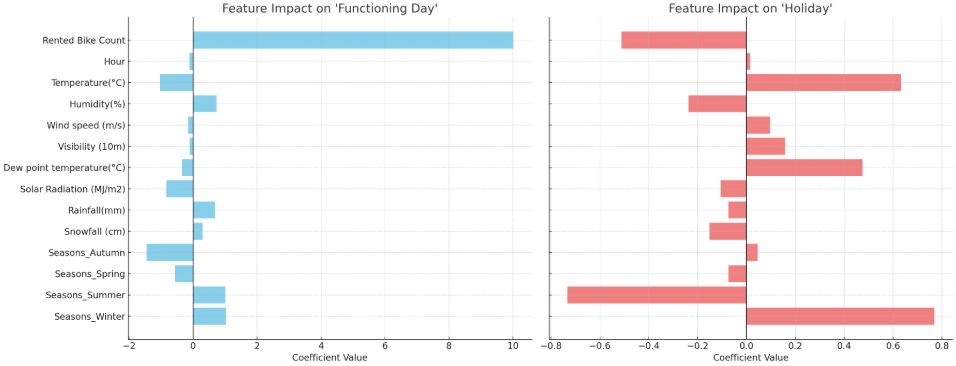

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\Nourhan\Downloads\image.png', width=600, height=400)


Feature impact for Functioning Day:
(Rented Bike Count	+10.0157	Strong positive impact)
(Seasons_Autumn	   -1.4601	    Negative impact)
(Temperature(°C)	   -1.0339	    Negative impact)
(Seasons_Summer	   +1.0105	    Positive impact)
(Seasons_Winter	   +1.0297	    Positive impact)
(Solar Radiation	   -0.8375	    Negative impact)

Feature impact for Holiday:
(Seasons_Winter	+0.7685	Positive impact)
(Seasons_Summer	-0.7334	Negative impact)
(Temperature(°C)	+0.6326	Positive impact)
(Dew point temperature	+0.4747	Positive impact)

Evaluate accuracy for both targets


In [27]:
#model will produc two predictions one for each target variable 

accuracy_functioning = accuracy_score(targetsL_test['Functioning Day'], predictionsL[:, 0])
#predictionsL[:, 0] is the first target variable (Functioning Day)

accuracy_holiday = accuracy_score(targetsL_test['Holiday'], predictionsL[:, 1])
#predictionsL[:, 1] is the second target variable (Holiday)

print(f'Accuracy for Functioning Day model: {accuracy_functioning}')
print(f'Accuracy for Holiday model: {accuracy_holiday}')

Accuracy for Functioning Day model: 0.9920091324200914
Accuracy for Holiday model: 0.954337899543379


Confusion Matrix

[[TN, FP],
 [FN, TP]]


In [28]:
# Confusion matrix for Functioning Day
conf_matrix_functioning = confusion_matrix(targetsL_test['Functioning Day'], predictionsL[:, 0])

# Confusion matrix for Holiday
conf_matrix_holiday = confusion_matrix(targetsL_test['Holiday'], predictionsL[:, 1])

print(f'Confusion Matrix for Functioning Day:\n{conf_matrix_functioning}')
print("******************")
print(f'Confusion Matrix for Holiday:\n{conf_matrix_holiday}')

Confusion Matrix for Functioning Day:
[[  46   12]
 [   2 1692]]
******************
Confusion Matrix for Holiday:
[[1672    0]
 [  80    0]]


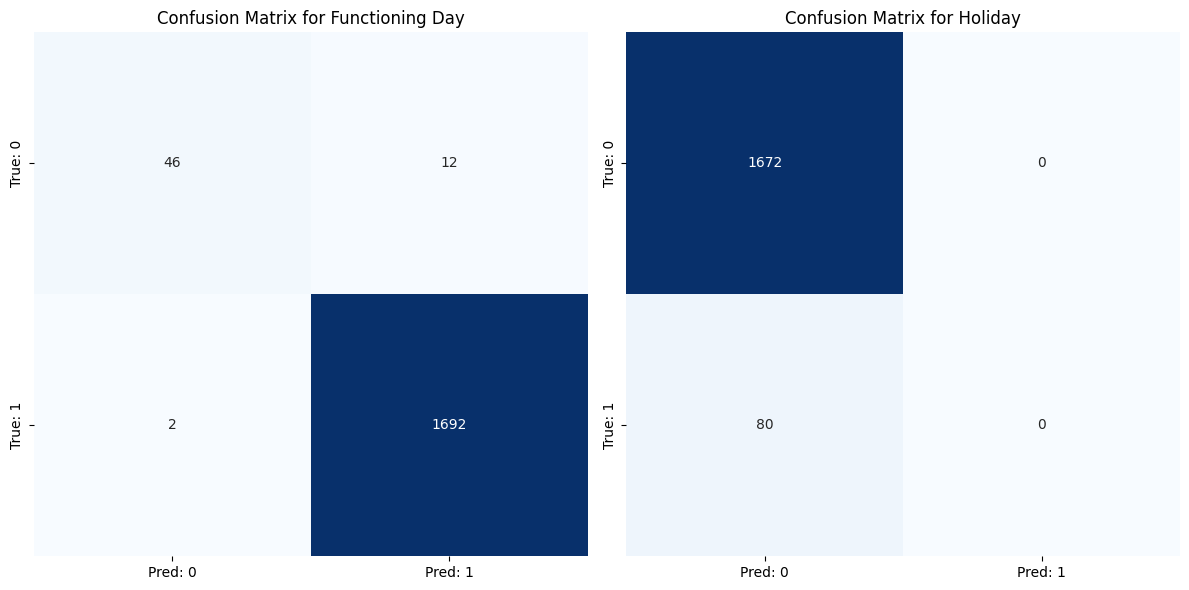

In [29]:
# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Functioning Day confusion matrix heatmap
sns.heatmap(conf_matrix_functioning, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0], 
            xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
axes[0].set_title('Confusion Matrix for Functioning Day')

# Holiday confusion matrix heatmap
sns.heatmap(conf_matrix_holiday, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1], 
            xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
axes[1].set_title('Confusion Matrix for Holiday')

# Show the plots
plt.tight_layout()
plt.show()


Polynomial Regression with single feature (Most Correlated)
Only regularization applied



DEG2

In [30]:

X = data[['Temperature(°C)']]
y = data['Rented Bike Count']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Apply Polynomial Features 
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

# --- Ridge Regression (L2 Regularization) ---
ridge_model = Ridge(alpha=1)  # alpha is the regularization strength
ridge_model.fit(X_train_poly2, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_poly2)

# Evaluate the Ridge model
mse_ridge2 = mean_squared_error(y_test, y_pred_ridge)
r2_ridge2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge2:.2f}")
print(f"Ridge Regression R²: {r2_ridge2:.4f}")




Ridge Regression MSE: 291802.19
Ridge Regression R²: 0.2994


DEG3

In [31]:

X = data[['Temperature(°C)']]  # Selected top most affecting features

y = data['Rented Bike Count']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Apply Polynomial Features 
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# --- Ridge Regression (L2 Regularization) ---
ridge_model = Ridge(alpha=1)  # alpha controls the regularization strength
ridge_model.fit(X_train_poly3, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_poly3)

# Evaluate the Ridge model
mse_ridge3 = mean_squared_error(y_test, y_pred_ridge)
r2_ridge3 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge3:.2f}")
print(f"Ridge Regression R²: {r2_ridge3:.4f}")


Ridge Regression MSE: 288538.19
Ridge Regression R²: 0.3073


DEG4

In [32]:

X = data[['Temperature(°C)']]  # Selected top most affecting features

y = data['Rented Bike Count']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Apply Polynomial Features 
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

# --- Ridge Regression (L2 Regularization) ---
ridge_model = Ridge(alpha=1)  # alpha controls the regularization strength
ridge_model.fit(X_train_poly4, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_poly4)

# Evaluate the Ridge model
mse_ridge4 = mean_squared_error(y_test, y_pred_ridge)
r2_ridge4 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge4:.2f}")
print(f"Ridge Regression R²: {r2_ridge4:.4f}")




Ridge Regression MSE: 287162.21
Ridge Regression R²: 0.3106


VISUALIZING

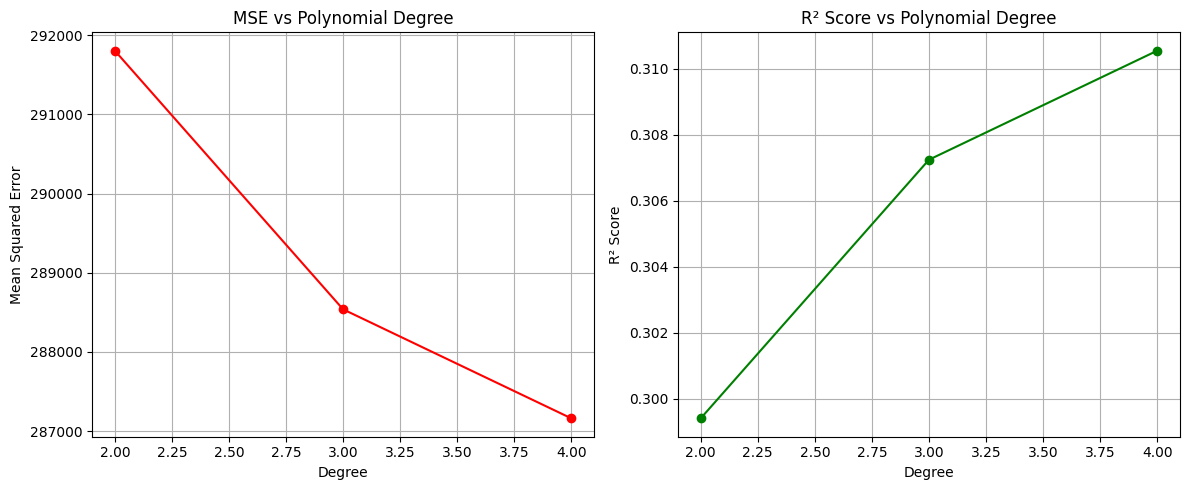

In [33]:
mseList = [mse_ridge2 , mse_ridge3 , mse_ridge4]
R2List = [r2_ridge2 , r2_ridge3 , r2_ridge4]
degreeUsed = [2 , 3,4]

plt.figure(figsize=(12, 5))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(degreeUsed, mseList, marker='o', color='red')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# R² Score Plot
plt.subplot(1, 2, 2)
plt.plot(degreeUsed, R2List, marker='o', color='green')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Polynomial regression with multiple features 



DEG2

In [34]:


X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Apply Polynomial Features 
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

# --- Ridge Regression (L2 Regularization) ---
ridge_model = Ridge(alpha=1)  # alpha is the regularization strength
ridge_model.fit(X_train_poly2, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_poly2)

# Evaluate the Ridge model
mse_ridge2 = mean_squared_error(y_test, y_pred_ridge)
r2_ridge2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge2:.2f}")
print(f"Ridge Regression R²: {r2_ridge2:.4f}")




Ridge Regression MSE: 121446.15
Ridge Regression R²: 0.7084


C:\Users\Nourhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.67614e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


DEG3

In [35]:

X = data[[ 
    'Temperature(°C)', 
    'Dew point temperature(°C)', 
    'Hour', 
    'Humidity(%)', 
    'Solar Radiation (MJ/m2)', 
    'Functioning Day', 
    'Visibility (10m)', 
    'Seasons_Winter', 
    'Seasons_Summer', 
    'Snowfall (cm)'
]]  # Selected top most affecting features

y = data['Rented Bike Count']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Apply Polynomial Features 
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# --- Ridge Regression (L2 Regularization) ---
ridge_model = Ridge(alpha=1)  # alpha controls the regularization strength
ridge_model.fit(X_train_poly3, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_poly3)

# Evaluate the Ridge model
mse_ridge3 = mean_squared_error(y_test, y_pred_ridge)
r2_ridge3 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge3:.2f}")
print(f"Ridge Regression R²: {r2_ridge3:.4f}")

# 93803.93


Ridge Regression MSE: 93803.93
Ridge Regression R²: 0.7748


C:\Users\Nourhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.45487e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


DEG4

In [36]:

X = data[[ 
    'Temperature(°C)', 
    'Dew point temperature(°C)', 
    'Hour', 
    'Humidity(%)', 
    'Solar Radiation (MJ/m2)', 
    'Functioning Day', 
    'Visibility (10m)', 
    'Seasons_Winter', 
    'Seasons_Summer'
]]  # Selected top most affecting features

y = data['Rented Bike Count']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Apply Polynomial Features 
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

# --- Ridge Regression (L2 Regularization) ---
ridge_model = Ridge(alpha=1)  # alpha controls the regularization strength
ridge_model.fit(X_train_poly4, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_poly4)

# Evaluate the Ridge model
mse_ridge4 = mean_squared_error(y_test, y_pred_ridge)
r2_ridge4 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge4:.2f}")
print(f"Ridge Regression R²: {r2_ridge4:.4f}")


Ridge Regression MSE: 75877.29
Ridge Regression R²: 0.8178


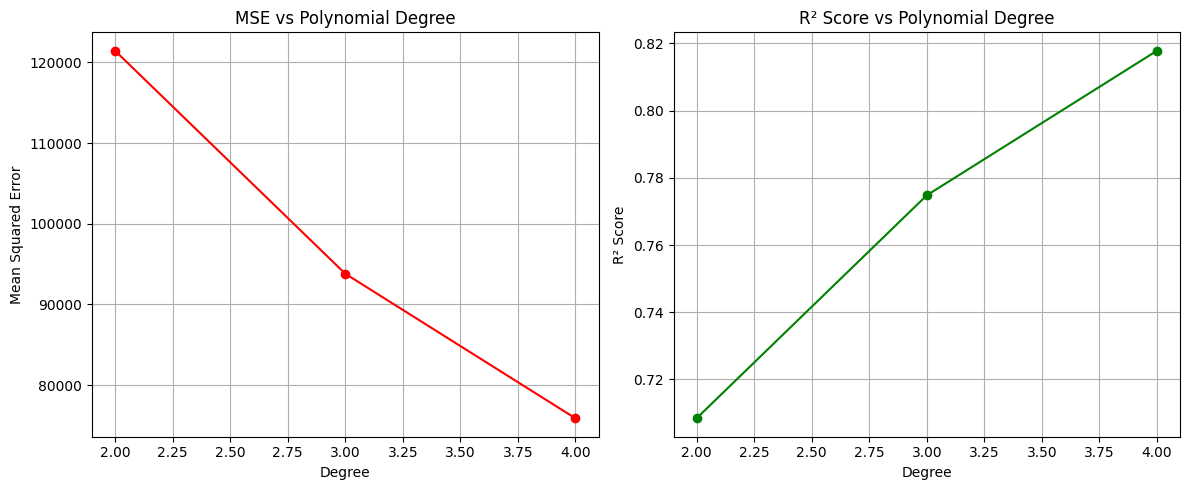

In [37]:
mseList = [mse_ridge2 , mse_ridge3 , mse_ridge4]
R2List = [r2_ridge2 , r2_ridge3 , r2_ridge4]
degreeUsed = [2 , 3,4]

plt.figure(figsize=(12, 5))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(degreeUsed, mseList, marker='o', color='red')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# R² Score Plot
plt.subplot(1, 2, 2)
plt.plot(degreeUsed, R2List, marker='o', color='green')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()